In [159]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import scipy.stats as stats




%matplotlib inline

import SimpleITK as sitk
# Download data to work on

In [93]:
# all_mask_fd = ("MCMrigid_roi_mask_221","MCMrigid_roi_mask_221")
# all_mask_fd = ("ACM_masks","ACM_masks","ACM_masks")

# seq can be "in, F, W, OPP"
# 

pax = 'MCM'
seq = 'in'
side='0' #'1'
mt = 'z'# 'z' # mask type can be z (skin fat) or intra 

if (pax=='MCM'):    
    all_mask_fd = "MCM_masks_"+mt
    if (seq=='in'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline_masked*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*30*z'+side+'*'))
    if (seq=='W'): 
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*W*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*28*W*z'+side+'*'))
    if (seq=='F'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*F*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*29*F*z'+side+'*'))
    if (seq=='OPP'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*OPP*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*31*OPP*z'+side+'*'))

else:
    all_mask_fd = "ACF_masks_"+mt

    if (seq=='in'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline_masked*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*21_m*z'+side+'*'))
    if (seq=='W'): 
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*W*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*21_W*z'+side+'*'))
    if (seq=='F'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*F*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*21_F*z'+side+'*'))
    if (seq=='OPP'):
        all_mask_fn = glob.glob(all_mask_fd+'/*baseline*OPP*'+mt+side+'*') + sorted(glob.glob(all_mask_fd+'/*21_OPP*z'+side+'*'))



colors= ("blue", "orange", "green")

# all_mask_fn = ("ACF_27_baseline_OPP_masked_z1.nii.gz", "ACF_27_221_OPP_masked_z1.nii.gz",  "ACF_27_321_OPP_masked_z1.nii.gz")  

print(all_mask_fn)

# all_mask_fn = ("MCM_baseline_masked.nii.gz","MCM_30_221_masked.nii.gz","MCM_30_321_masked.nii.gz")


['MCM_masks_z/MCM_baseline_masked_z0.nii.gz', 'MCM_masks_z/MCM_30_221_masked_z0.nii.gz', 'MCM_masks_z/MCM_30_321_masked_z0.nii.gz']


M MCM_masks_z/MCM_baseline_masked_z0.nii.gz
395.8828125 394.89007661939854 1596.0 8.0 8111.267448844945 189251859.0 479252 1872085.2664113045
      count        mean        std  min    25%    50%    75%     max
0  479252.0  394.890077  90.062575  8.0  339.0  395.0  451.0  1596.0


/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C MCM_masks_z/MCM_30_221_masked_z0.nii.gz
326.98046875 338.9814814339768 1222.0 4.0 8315.60839074677 132143456.0 389825 1522745.1929822564
      count        mean        std  min    25%    50%    75%     max
0  389825.0  338.981481  91.189958  4.0  282.0  325.0  386.0  1222.0


/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


M MCM_masks_z/MCM_30_321_masked_z0.nii.gz
300.06640625 311.2902260035353 622.0 41.0 6455.9520500328335 114996524.0 369419 1443048.473522067
      count        mean        std   min    25%    50%    75%    max
0  369419.0  311.290226  80.348939  41.0  258.0  299.0  356.0  622.0


/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x432 with 0 Axes>

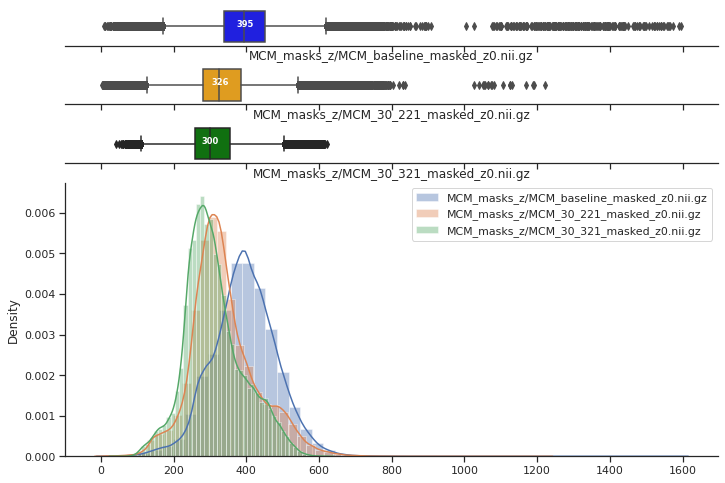

In [279]:
# bins_hist = 800
nf = len(all_mask_fn)
vertical_offset =0
a4_dims = (11.7, 8.27)
df_nda =pd.DataFrame(columns=['count','mean','std','min','25%','50%','75%','max'])

sns.set(style="ticks")
label_stats = sitk.LabelStatisticsImageFilter()

label_shape = sitk.LabelShapeStatisticsImageFilter()


# f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
#                                     gridspec_kw={"height_ratios": (.25, .75)})

plt.figure(figsize=(20, 6))
f, ax = plt.subplots(nf+1, figsize=a4_dims, sharex=True, 
                                    gridspec_kw={"height_ratios": (.1, 0.1,0.1, .70)})

ind =0

df = pd.DataFrame(columns=['Median','Mean', 'Max','Min','Variance','Sum','Count','Volume'])

for fd,fn in zip(all_mask_fd,all_mask_fn):
    print(fd,fn)
    mask_im= sitk.ReadImage(fn)
    m_sp = mask_im.GetSpacing()
    label_stats.Execute(mask_im, mask_im > 0)
    st_median = label_stats.GetMedian(1)
    st_mean = label_stats.GetMean(1)
    st_max = label_stats.GetMaximum(1)
    st_min = label_stats.GetMinimum(1)
    st_var = label_stats.GetVariance(1)
    st_sum = label_stats.GetSum(1)
    st_count = label_stats.GetCount(1)
    
    label_shape.Execute(mask_im>0)
    st_vol = label_shape.GetPhysicalSize(1)
#     print(m_sp)
#     st_vol = 0
#     for i in range(3):
#         st_vol += float(st_count) * m_sp[i]
    
    print(st_median, st_mean, st_max, st_min, st_var, st_sum,st_count,st_vol)
    df.loc[len(df), :] = [st_median, st_mean, st_max, st_min, st_var, st_sum,st_count, st_vol]
    nda = sitk.GetArrayViewFromImage(mask_im)
    nda_nz = nda[nda!=0].flatten()
    
    df_aux = pd.DataFrame(data=nda_nz)
#     df_nda.loc[len(df_nda), :] = pd.DataFrame({"dist":nda_nz}).describe()
    
#     df.apply(pd.DataFrame.describe,axis = 0)
    df_aux = df_aux.describe().transpose()
    print(df_aux)
    df_nda.loc[len(df_nda), :] = df_aux.loc[0]

#     dades[ind] = nda_nz.astype(float)
    dades[ind] =pd.DataFrame(nda_nz, columns = ['data'])
#     dades[ind] = np.histogram(nda_nz, bins=1000)[0]
    
    
    bp = sns.boxplot(nda_nz, ax = ax[ind], color = colors[ind])
    ax[ind].set(xlabel=fn)
    bp.text(st_median + vertical_offset,0,int(st_median), 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
    sns.distplot(nda_nz, ax=ax[nf], label = fn )
    
    sns.despine(ax=ax[ind], left=True)
    ax[ind].set(yticks=[])
    ind += 1



sns.despine(ax=ax[nf])

plt.legend()
plt.show()


### Statistical Analysis.
Performing t-test on two indenpendent samples (can't do paired t-test as they don't have the same number of pixels exactly.
https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174/


[15.42727498 14.03947757 16.05194951 ... -1.42316108 24.55670878
  4.51420043]
Ttest_indResult(statistic=1.6207321725105976, pvalue=0.10507666709355742)


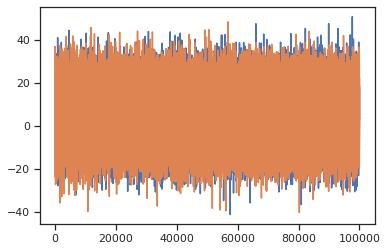

In [260]:
print (rvs1)
rvs1 = stats.norm.rvs(loc = 5,scale = 10,size = 100000)

rvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 100000)
plt.plot (rvs1)
plt.plot (rvs2)
print(stats.ttest_ind(rvs1,rvs2, equal_var = True))


In [276]:
print(dades[1])

          0
0       216
1       216
2       209
3       202
4       193
...     ...
389820  346
389821  338
389822  349
389823  513
389824  461

[389825 rows x 1 columns]


369419


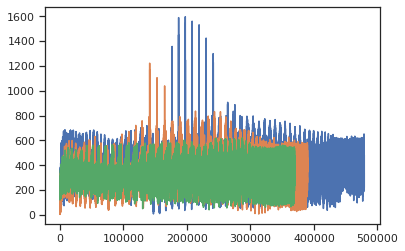

In [280]:
# print(rvs1)
print(len(dades[2]))
plt.plot(dades[0])
plt.plot(dades[1])
plt.plot(dades[2])

In [284]:
researchpy.ttest(dades[1]['data'],dades[2]['data'])

(   Variable         N        Mean         SD        SE   95% Conf.    Interval
 0      data  389825.0  338.981481  91.189958  0.146054  338.695221  339.267742
 1      data  369419.0  311.290226  80.348939  0.132197  311.031124  311.549328
 2  combined  759244.0  325.507979  87.191310  0.100065  325.311855  325.704103,
             Independent t-test      results
 0  Difference (data - data) =       27.6913
 1        Degrees of freedom =   759242.0000
 2                         t =      140.0924
 3     Two side test p value =        0.0000
 4    Difference < 0 p value =        1.0000
 5    Difference > 0 p value =        0.0000
 6                 Cohen's d =        0.3217
 7                 Hedge's g =        0.3217
 8             Glass's delta =        0.3037
 9               Pearson's r =        0.1587)

In [229]:
t01 = stats.chi2_contingency(dades[0],dades[1])
t02 = stats.chi2_contingency(dades[0],dades[2])
t03 = stats.chi2_contingency(dades[1],dades[2])
print(t01, t02, t03)

ValueError: The internally computed table of expected frequencies has a zero element at (3,).

In [255]:
stats.shapiro(dades[0])
stats.levene(dades[0], dades[1])

LeveneResult(statistic=28.75019103147713, pvalue=8.236272247981642e-08)

In [266]:
t01 = stats.mannwhitneyu(dades[0][0:20],dades[1][0:20])
t02 = stats.mannwhitneyu(dades[0],dades[2])
t03 = stats.mannwhitneyu(dades[1],dades[2])
print(t01, t02, t03)


MannwhitneyuResult(statistic=73.0, pvalue=0.00031063179379306574) MannwhitneyuResult(statistic=41428372826.0, pvalue=0.0) MannwhitneyuResult(statistic=58247946650.5, pvalue=0.0)


In [253]:
t01 = stats.ks_2samp(dades[0],dades[1])
t02 = stats.ks_2samp(dades[0],dades[2])
t03 = stats.ks_2samp(dades[1],dades[2])
print(t01, t02, t03)


KstestResult(statistic=0.33993436101341934, pvalue=0.0) KstestResult(statistic=0.4454152176487937, pvalue=0.0) KstestResult(statistic=0.15391946210900576, pvalue=0.0)


In [252]:
t01 = stats.ttest_ind(dades[0],dades[1],equal_var=False)
t02 = stats.ttest_ind(dades[0],dades[2],equal_var=False)
t03 = stats.ttest_ind(dades[1],dades[2],equal_var=False)
print(t01, t02, t03)


Ttest_indResult(statistic=285.84197348616465, pvalue=0.0) Ttest_indResult(statistic=450.7348836257074, pvalue=0.0) Ttest_indResult(statistic=140.56727345219517, pvalue=0.0)


In [156]:
print(df_nda)

    count     mean      std min  25%  50%  75%   max
0  479252   394.89  90.0626   8  339  395  451  1596
1  389825  338.981    91.19   4  282  325  386  1222
2  369419   311.29  80.3489  41  258  299  356   622


In [157]:
# plt.boxplot(all_hist.transpose)
print (df)

    Median     Mean   Max Min Variance          Sum   Count       Volume
0  395.883   394.89  1596   8  8111.27  1.89252e+08  479252  1.87209e+06
1   326.98  338.981  1222   4  8315.61  1.32143e+08  389825  1.52275e+06
2  300.066   311.29   622  41  6455.95  1.14997e+08  369419  1.44305e+06


In [40]:
sns

<module 'seaborn' from '/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/__init__.py'>

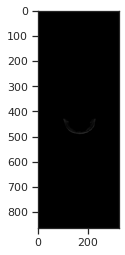

In [19]:
nda = sitk.GetArrayViewFromImage(mask_im[:,:,40])
plt.imshow(nda,cmap="gray", vmin=0, vmax=1000)